→ Found existing file for listings, skipping download.
→ Found existing file for calendar, skipping download.
→ Found existing file for reviews, skipping download.
→ Found existing file for neighbourhoodsCSV, skipping download.
→ Found existing file for neighbourhoodsJSON, skipping download.
(7096, 79)
                 id     scrape_id       host_id  host_listings_count  \
count  7.096000e+03  7.096000e+03  7.096000e+03          7096.000000   
mean   6.375726e+17  2.025032e+13  2.033138e+08             6.209837   
std    5.268514e+17  0.000000e+00  2.028592e+08            45.350743   
min    9.794500e+04  2.025032e+13  1.581000e+03             1.000000   
25%    3.861002e+07  2.025032e+13  2.710067e+07             1.000000   
50%    7.535275e+17  2.025032e+13  1.176635e+08             1.000000   
75%    1.145198e+18  2.025032e+13  3.769615e+08             2.000000   
max    1.379568e+18  2.025032e+13  6.838635e+08          1063.000000   

       host_total_listings_count  neighbourhood

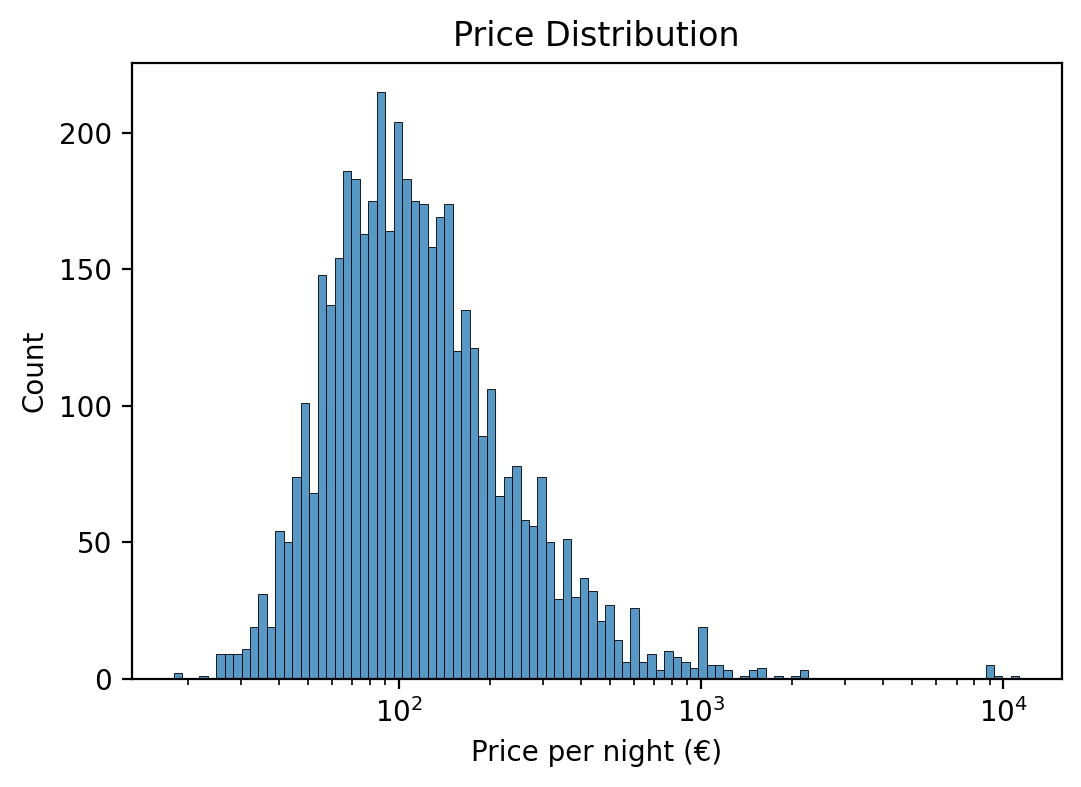

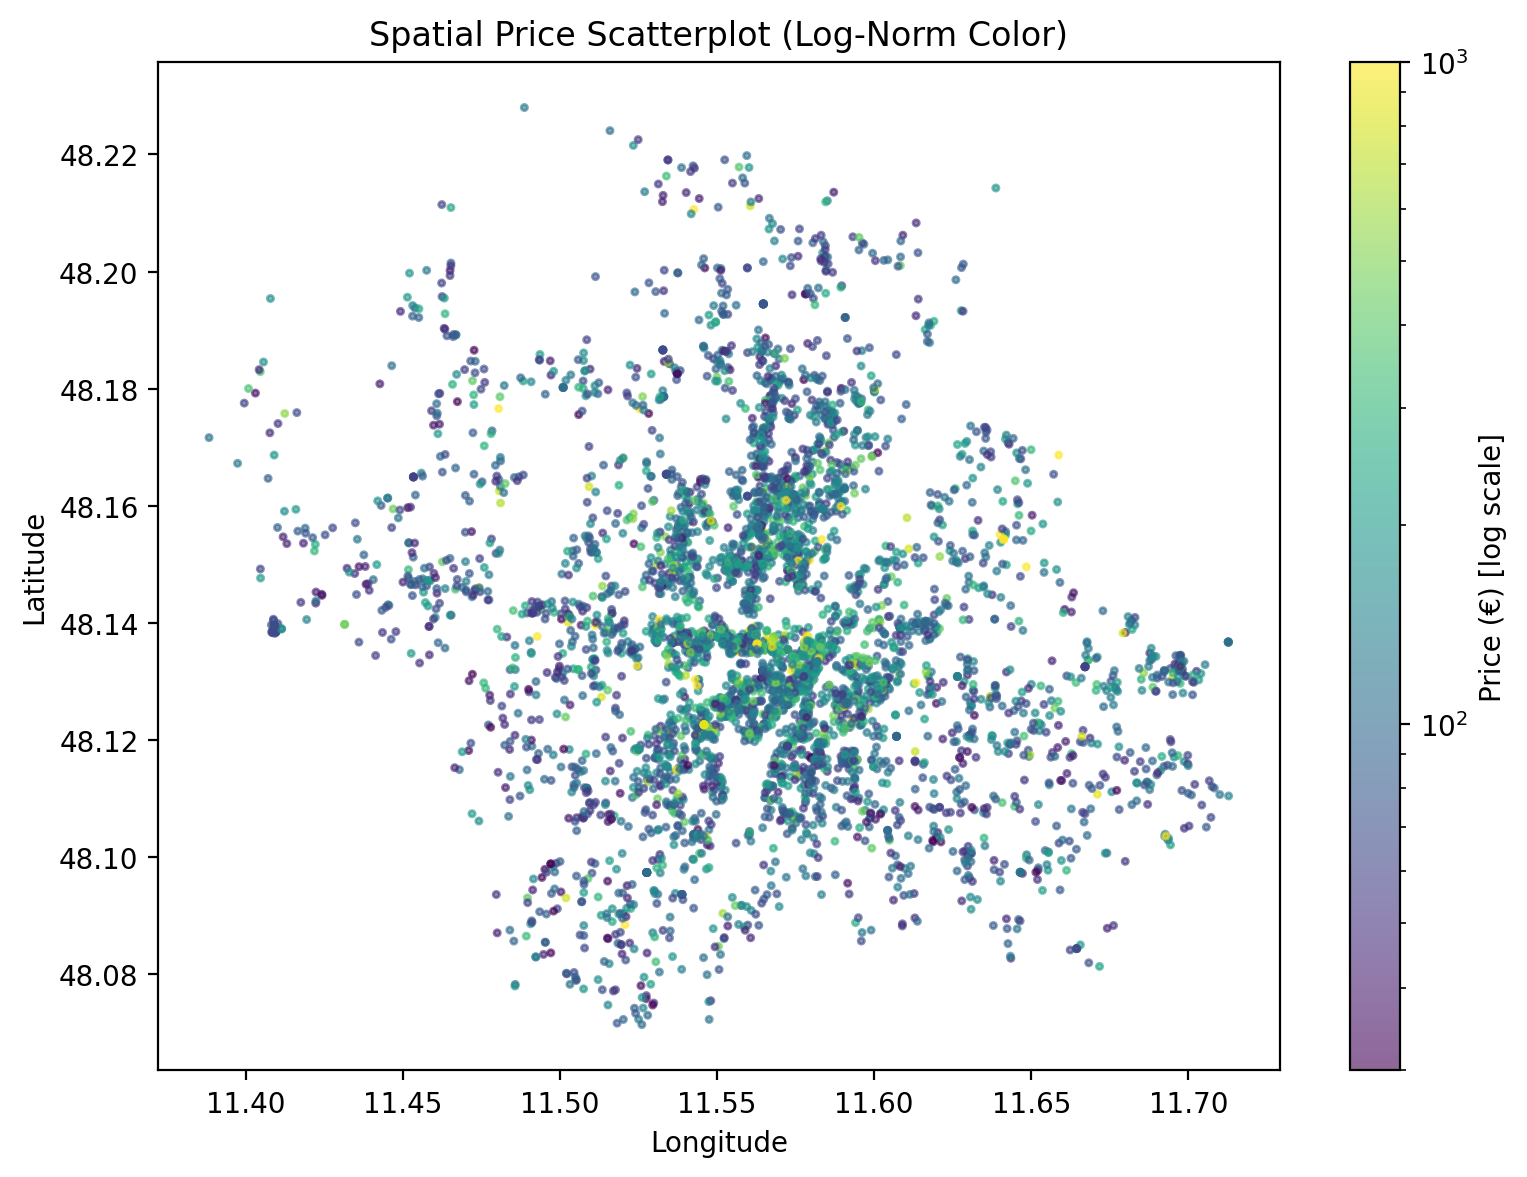

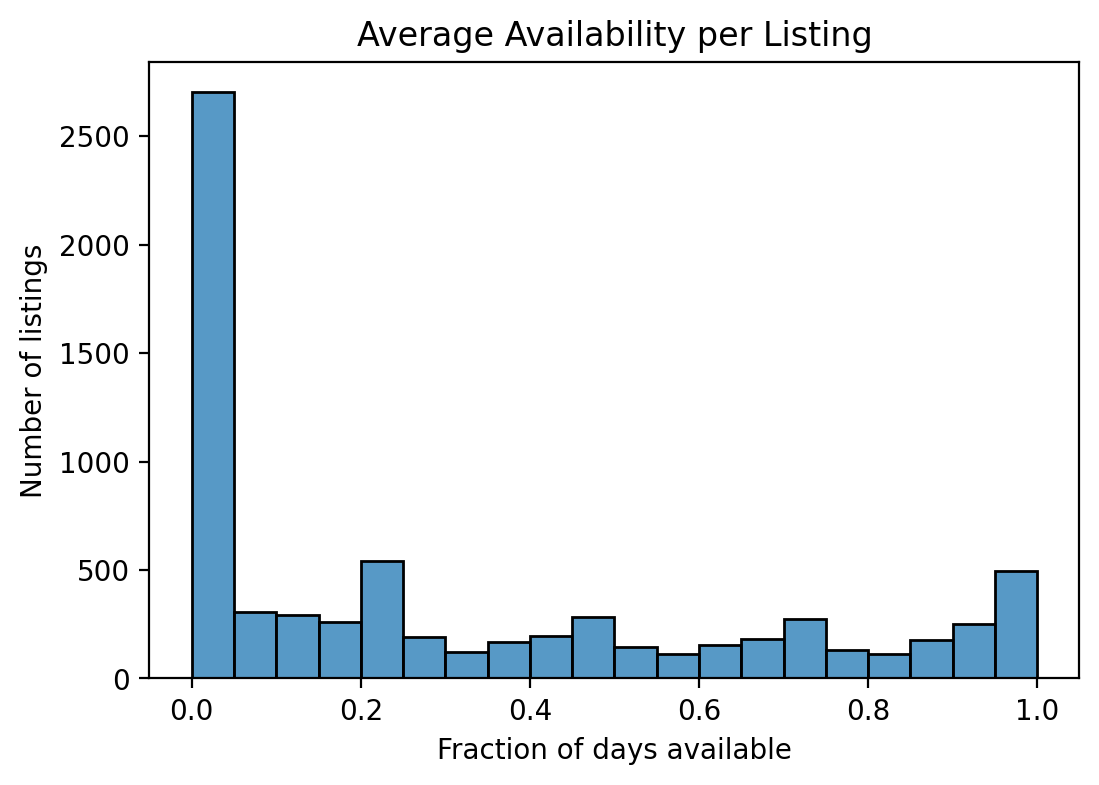

In [1]:
# %% Preamble: Environment & Imports
import os
import sys
# Make sure that we have one level above (project root) as the module root.
sys.path.insert(0, os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook Beautifier
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from src.data.load import load_all


# 2) Download + Laden
data = load_all()
df_listings = data["listings"]
df_calendar = data["calendar"]
df_reviews  = data["reviews"]

# 3)Rough Statistics & Missing Values
print(df_listings.shape)
print(df_listings.describe())
print(df_listings.isnull().mean().sort_values(ascending=False).head(10))

# 4) Distribution of nightly prices
#    Remove currency symbols, parse to float
df_listings["price"] = (
    df_listings["price"]
    .str.replace(r"[^\d\.]", "", regex=True)
    .astype(float)
)

plt.figure(figsize=(6,4))
sns.histplot(df_listings["price"], bins=100, log_scale=(True, False))
plt.title("Price Distribution")
plt.xlabel("Price per night (€)")
plt.ylabel("Count")
plt.show()

# 5) Geographic distribution: Scatter plot of latitude/longitude colored by price
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(8,6))

# LogNorm: colors log-scaled between e.g. 30 and 1000 €
norm = mcolors.LogNorm(
    vmin=df_listings["price"].clip(lower=30).min(),
    vmax=df_listings["price"].clip(upper=1000).max()
)

sc = ax.scatter(
    df_listings["longitude"],
    df_listings["latitude"],
    c=df_listings["price"],
    norm=norm,                 # <-- here
    cmap="viridis",            # different Colormap
    s=5,
    alpha=0.6
)

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Price (€) [log scale]")

ax.set_title("Spatial Price Scatterplot (Log-Norm Color)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.show()

# 6) Temporal availability (Calendar): Share of available days
df_calendar["available_flag"] = df_calendar["available"].map({"t":1, "f":0})
avail = df_calendar.groupby("listing_id")["available_flag"].mean()
plt.figure(figsize=(6,4))
sns.histplot(avail, bins=20)
plt.title("Average Availability per Listing")
plt.xlabel("Fraction of days available")
plt.ylabel("Number of listings")
plt.show()

Current working directory: /Users/claudiupanainte/Desktop/Airbnb-price-prediction_02/notebooks
Raw shape: (7096, 79)
Cleaned shape: (7096, 74)

Missing values (raw):
calendar_updated                1.000000
neighbourhood_group_cleansed    1.000000
license                         0.994645
host_neighbourhood              0.753382
neighbourhood                   0.653044
neighborhood_overview           0.653044
host_about                      0.608512
price                           0.349211
estimated_revenue_l365d         0.349211
beds                            0.348224
dtype: float64

Missing values (clean):
id                           0.0
estimated_occupancy_l365d    0.0
availability_eoy             0.0
number_of_reviews_l30d       0.0
number_of_reviews_ltm        0.0
number_of_reviews            0.0
calendar_last_scraped        0.0
availability_365             0.0
availability_90              0.0
availability_60              0.0
dtype: float64

Raw data example:


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,97945,https://www.airbnb.com/rooms/97945,20250319150628,2025-03-19,city scrape,Deluxw-Apartm. with roof terrace,NaN,We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,517685,...,4.93,4.78,4.73,NaN,f,2,2,0,0,0.77
1,114695,https://www.airbnb.com/rooms/114695,20250319150628,2025-03-19,city scrape,Apartment Munich/East with sundeck,NaN,NaN,https://a0.muscache.com/pictures/21571874/960e...,581737,...,5.00,4.67,4.62,NaN,f,3,3,0,0,0.47
2,127383,https://www.airbnb.com/rooms/127383,20250319150628,2025-03-20,previous scrape,City apartment next to Pinakothek,NaN,NaN,https://a0.muscache.com/pictures/79238c11-bc61...,630556,...,4.96,4.91,4.81,NaN,f,1,1,0,0,0.69



Cleaned data example:


,id,listing_url,scrape_id,last_scraped,source,name,description,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_per_person,description_length
0,97945,https://www.airbnb.com/rooms/97945,0.0,2025-03-19,city scrape,Deluxw-Apartm. with roof terrace,Enjoy the simple life at this quiet and centra...,https://a0.muscache.com/pictures/2459996/10b4c...,517685,https://www.airbnb.com/users/show/517685,...,-0.103058,0.204224,f,2,2,0,0,-0.044211,-0.067181,-1.785823
1,114695,https://www.airbnb.com/rooms/114695,0.0,2025-03-19,city scrape,Apartment Munich/East with sundeck,Enjoy the simple life at this quiet and centra...,https://a0.muscache.com/pictures/21571874/960e...,581737,https://www.airbnb.com/users/show/581737,...,-0.494068,-0.083939,f,3,3,0,0,-0.235088,-0.462938,-1.785823
2,127383,https://www.airbnb.com/rooms/127383,0.0,2025-03-20,previous scrape,City apartment next to Pinakothek,Enjoy the simple life at this quiet and centra...,https://a0.muscache.com/pictures/79238c11-bc61...,630556,https://www.airbnb.com/users/show/630556,...,0.359046,0.413797,f,1,1,0,0,-0.095111,-0.385534,-1.785823


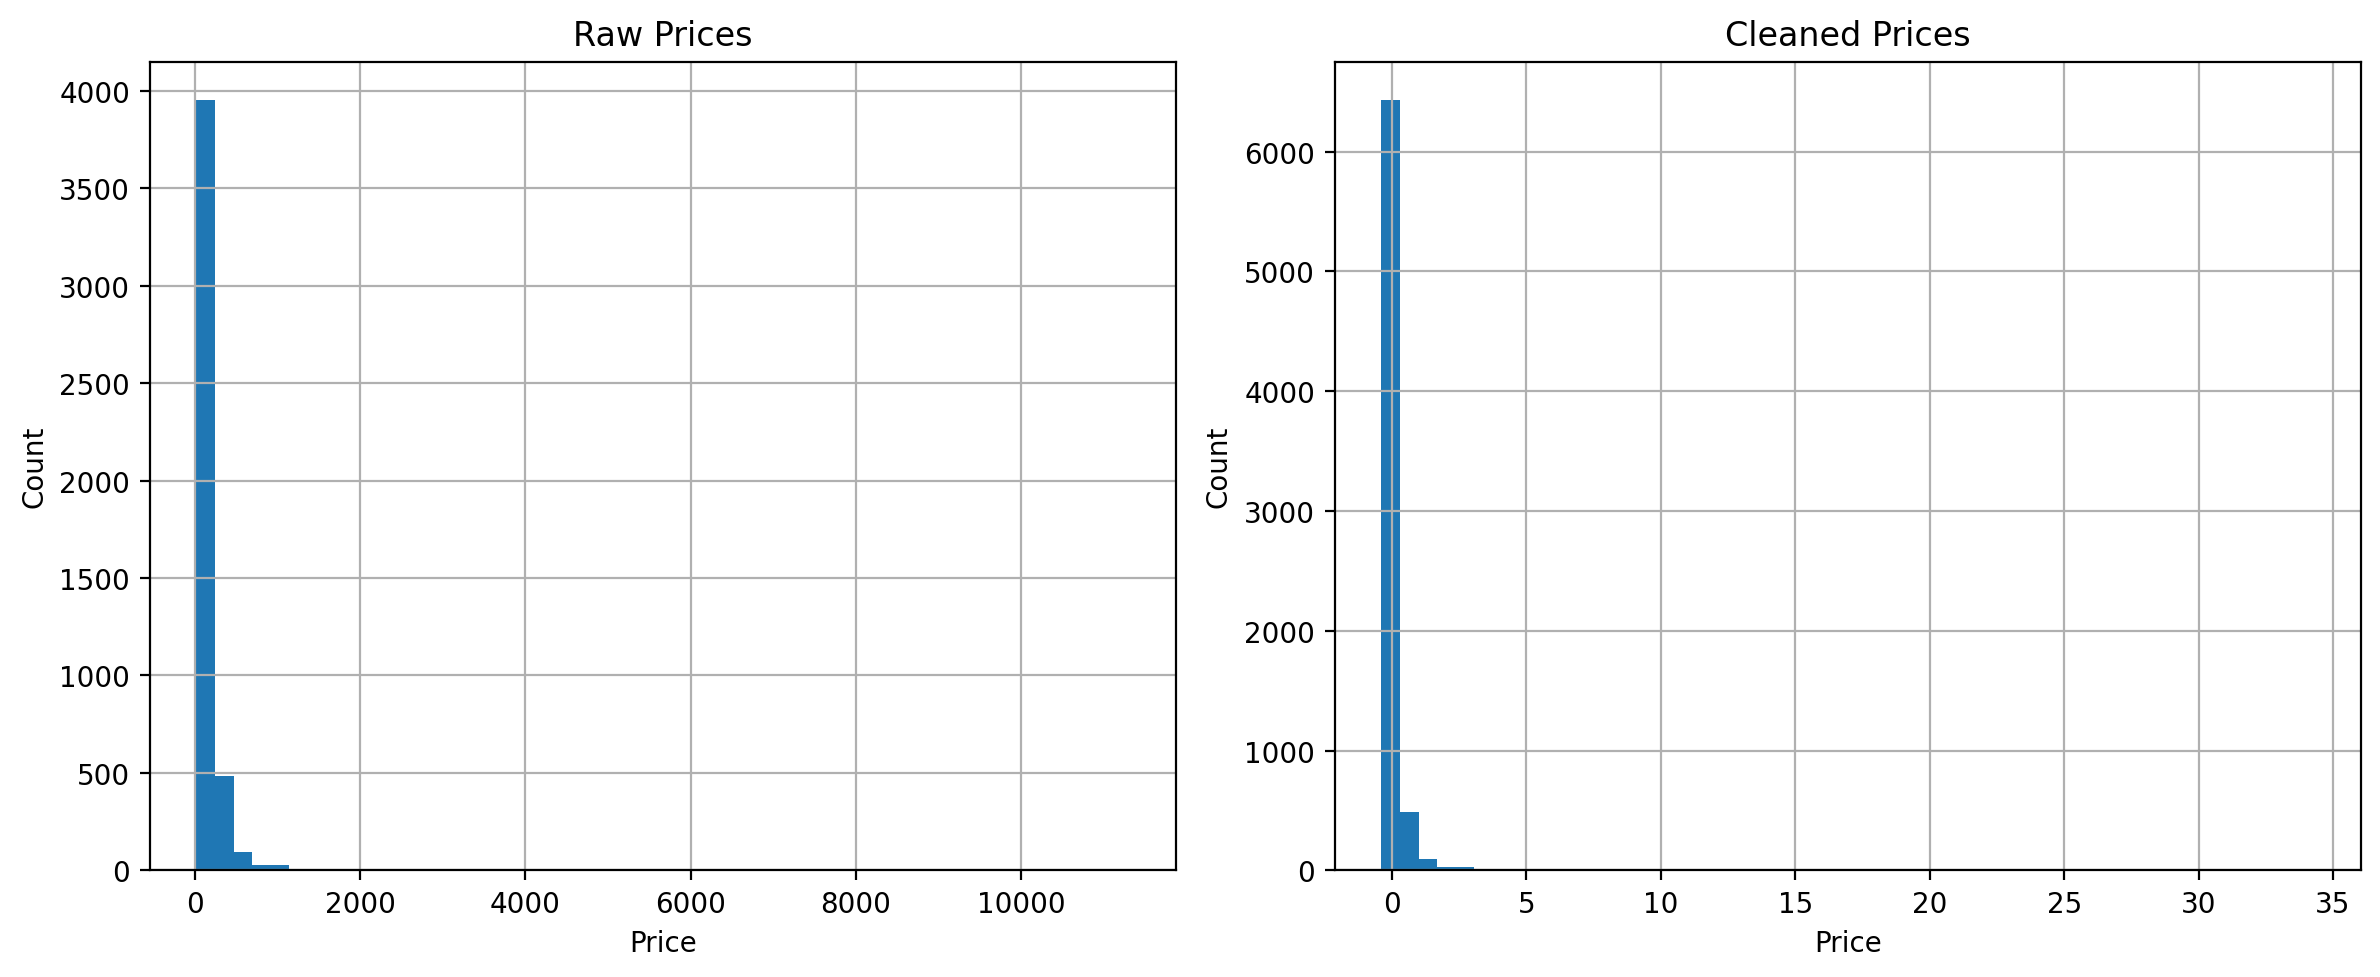


Columns in raw:
['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availabilit

In [2]:
# --- Compare Raw vs. Cleaned Data ---

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check working directory
print("Current working directory:", os.getcwd())

# Define paths
raw_path = "../data/raw/listings.gz"
clean_path = "../data/processed/listings_clean.csv"


# Check if files exist before loading
if not os.path.exists(raw_path):
    raise FileNotFoundError(f"Raw data not found at {raw_path}. Run the data download or preprocessing first!")
if not os.path.exists(clean_path):
    raise FileNotFoundError(f"Cleaned data not found at {clean_path}. Run the preprocessing script first!")

# Load data
df_raw = pd.read_csv(raw_path)
df_clean = pd.read_csv(clean_path)

print("Raw shape:", df_raw.shape)
print("Cleaned shape:", df_clean.shape)

# Show missing values (Top 10 columns)
print("\nMissing values (raw):")
print(df_raw.isnull().mean().sort_values(ascending=False).head(10))
print("\nMissing values (clean):")
print(df_clean.isnull().mean().sort_values(ascending=False).head(10))

# Show example rows
print("\nRaw data example:")
display(df_raw.head(3))
print("\nCleaned data example:")
display(df_clean.head(3))

# Price distribution before and after cleaning
raw_price = (
    df_raw['price']
    .astype(str)
    .str.replace(r'[^\d\.]', '', regex=True)
    .replace('', np.nan)
    .astype(float)
)
clean_price = df_clean['price']

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
raw_price.hist(bins=50)
plt.title('Raw Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.subplot(1,2,2)
clean_price.hist(bins=50)
plt.title('Cleaned Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Compare columns
print("\nColumns in raw:")
print(list(df_raw.columns))
print("\nColumns in cleaned:")
print(list(df_clean.columns))

# Insights
#Around 7,000 Airbnbs, and the price per night is around 100 EUR

#As expected, most apartments are located in the city center, and those are also the most expensive

#A large share of the apartments is rented out only occasionally (around 2,500)